In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
## Read Vector Files
point=gpd.read_file(r'E:\Personal\Training Programme\PostgreSQL\Practice\points\points.shp')
roads=gpd.read_file(r'E:\Personal\Training Programme\PostgreSQL\Practice\roads\roads.shp')

Text(0.5, 1.0, 'Points Mapped')

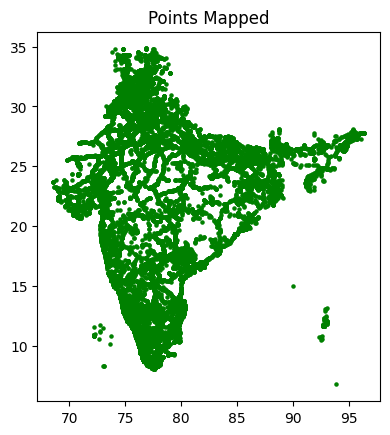

In [11]:
## Assign web marketor projection to point layer
points_reproject=point.to_crs(epsg=3857)
point.plot(color='green', markersize=5, marker='o')
plt.title('Points Mapped')


Text(0.5, 1.0, 'Roads Mapped')

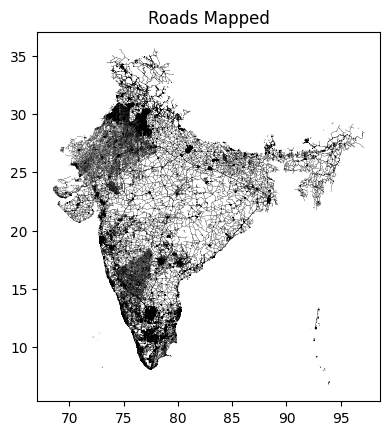

In [10]:
## Assign web marketor projection to road layer
roads_reproject=roads.to_crs(epsg=3857)
roads.plot(color='black', linewidth=0.2)
plt.title('Roads Mapped')

Text(0.5, 1.0, 'Buffer Creation')

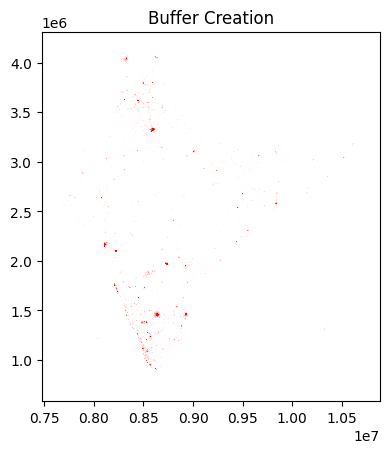

In [9]:
## Buffer Creation of point layer
points_buffer_100m=points_reproject.buffer(100)
points_buffer_100m.plot(color='red')
plt.title('Buffer Creation')

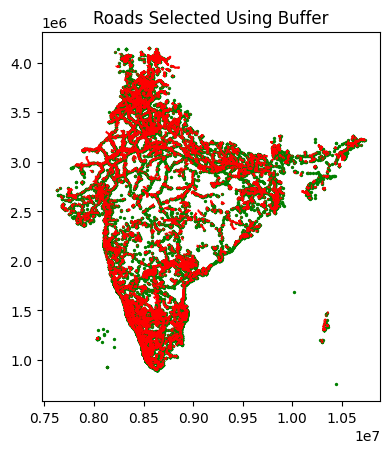

In [8]:
## Dataframe creation & spatial join analysis to select road data that intersect with the buffer area
buffer_gdf=gpd.GeoDataFrame(geometry=points_buffer_100m,crs=points_reproject.crs)
select_road=gpd.sjoin(roads_reproject, buffer_gdf, predicate='intersects')


ax=buffer_gdf.plot(color='blue', alpha=0.5, edgecolor='black')
select_road.plot(ax=ax, color='red')
points_reproject.plot(ax=ax, color='green', marker='o', markersize=2)
plt.title('Roads Selected Using Buffer')

plt.show()

In [7]:
## resulting in select_road
total_roads = roads_reproject.count()
roads_selected =select_road.count()


print('Total Roads Selected',roads_selected)
print('Total Roads Available in Layer', total_roads)

Total Roads Selected osm_id         315550
name           110752
ref             31355
type           315550
oneway         315550
bridge         315550
tunnel         315550
maxspeed        23171
geometry       315550
index_right    315550
dtype: int64
Total Roads Available in Layer osm_id      852566
name         55315
ref          54732
type        852566
oneway      852566
bridge      852566
tunnel      852566
maxspeed     14779
geometry    852566
dtype: int64
